<span style="font-size:8pt"><i>ENSAM-Bordeaux, Mathématiques et informatique. Date : le 20/03/22. Auteur : Éric Ducasse. Version : 1.21</i></span>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sympy as sb
sb.init_printing()
from IPython.display import display

In [4]:
print("Version de sympy :", sb.__version__) 

Version de sympy : 1.8


# <span style="color:#0066BB"> **Calcul formel : TD n°2, première partie** </span>

<div class="alert alert-block alert-danger"> <span style="color:#800000"> <b>Pour chaque exercice, faire exécuter la partie <i>exemples</i> cellule par cellule <tt>(Maj+Entrée)</tt>, avant de passer à la partie <i>Travail à faire</i>.</b> </span> </div>

## <span style="color: #0000BB"> *Exercice 9* </span>

### <span style="color:purple"> 9.1 Objectifs </span>

#### <span style="color:#005500"><i>Savoir créer, modifier et utiliser des dictionnaires $($classe <span style="color:#806000;font-size:12pt"><tt>dict</tt></span>$)$ dans le cadre général de la programmation en Python.</i></span>

### <span style="color:purple"> 9.2 Exemples de manipulation de dictionnaires </span>

Voir aussi : https://docs.python.org/fr/3/tutorial/datastructures.html#dictionaries

#### <span style="color:#505000">$a)$ Création et ajout d'items</span>

Ensemble non ordonné d'associations **Clef$~/~$Objet**

* <span style="color:#0000B0"> Définition directe </span>

In [5]:
dico = {"c":"truc","b":sb.pi,"a":[-2.34,5.67]} ; dico

{'c': 'truc', 'b': pi, 'a': [-2.34, 5.67]}

* <span style="color:#0000B0"> Définition par conversion d'une liste de couples </span>

In [6]:
dict( (("c","truc"),("b",sb.pi),("a",[-2.34,5.67])) ) # équivalent

{'c': 'truc', 'b': pi, 'a': [-2.34, 5.67]}

* <span style="color:#0000B0"> Définition par ajout progressif de chaque couple clef$\;/\;$valeur </span>

In [7]:
dico = dict()  # ou  dico = {}
for key,val in (("c","truc"),("b",sb.pi),("a",[-2.34,5.67])) :
    dico[key] = val
dico

{'c': 'truc', 'b': pi, 'a': [-2.34, 5.67]}

#### <span style="color:#505000">$b)$ **Méthodes disponibles**</span>

In [8]:
[m for m in dir(dico) if not m.startswith("__")]

['clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

* <span style="color:#0000B0"> Copie d'un dictionnaire (voir l'effet plus bas) </span>

In [9]:
dico_1 = dico.copy() ; dico_1

{'c': 'truc', 'b': pi, 'a': [-2.34, 5.67]}

* <span style="color:#0000B0"> Création d'un dictionnaire où toutes les clefs sont associées à la même valeur </span>

In [10]:
dico_2 = dict.fromkeys([1,2,3],sb.symbols("x")) ; dico_2

* <span style="color:#0000B0"> Intégration d'un dictionnaire dans un autre </span>

In [11]:
help(dict.update)

Help on method_descriptor:

update(...)
    D.update([E, ]**F) -> None.  Update D from dict/iterable E and F.
    If E is present and has a .keys() method, then does:  for k in E: D[k] = E[k]
    If E is present and lacks a .keys() method, then does:  for k, v in E: D[k] = v
    In either case, this is followed by: for k in F:  D[k] = F[k]



In [12]:
dico_1.update(dico_2) ; dico_1

{'c': 'truc', 'b': pi, 'a': [-2.34, 5.67], 1: x, 2: x, 3: x}

In [13]:
dico_1.update({'c':"bidule", 4: sb.symbols("y")}) ; dico_1 # Remplacement de la valeur associée à la clef 'c'

{'c': 'bidule', 'b': pi, 'a': [-2.34, 5.67], 1: x, 2: x, 3: x, 4: y}

* <span style="color:#0000B0"> Comme <span style="color:#804000;font-size:12pt"><b><tt>dico_1</tt></b></span> est une copie de <span style="color:#804000;font-size:12pt"><b><tt>dico</tt></b></span>, ce dernier n'est pas modifié : </span>

In [14]:
dico

{'c': 'truc', 'b': pi, 'a': [-2.34, 5.67]}

* <span style="color:#0000B0"> Nombre d'items dans un dictionnaire : </span>

In [15]:
(len(dico), len(dico_1))

#### <span style="color:#505000">$c)$ Accès à la</span>  <span style="color:#A04000"> *valeur* </span> <span style="color:#505000">par la</span> <span style="color:#A04000">*clef*</span> 

In [16]:
dico["b"]

* <span style="color:#0000B0"> Si la clef n'existe pas, soulève une erreur : </span>

In [17]:
try :
    dico["d"]
except :
    print("Erreur d'exécution !")

Erreur d'exécution !


* <span style="color:#0000B0"> Si la clef n'existe pas, renvoie</span> <span style="color:#A05000;font-size:12pt"><tt><b>None</b></tt></span></span> : 

In [18]:
[ dico.get(k) for k in ["a","b","c","d"] ]

[[-2.34, 5.67], pi, 'truc', None]

* <span style="color:#0000B0"> Suppression d'une entrée du dictionnaire </span> : 

In [19]:
del dico['a']
dico

{'c': 'truc', 'b': pi}

#### <span style="color:#505000">$d)$ Itérables

##### i/ *Différentes manières d'accéder à la liste des clefs*

**Attention** : un dictionnaire n'est pas ordonné !

In [20]:
dico.keys()

dict_keys(['c', 'b'])

In [21]:
"d" in dico.keys()

False

In [22]:
sorted(dico.keys())

['b', 'c']

In [23]:
list(dico)

['c', 'b']

##### ii/ *Liste des valeurs*

In [24]:
dico.values()

dict_values(['truc', pi])

In [25]:
list(dico.values())

['truc', pi]

##### iii/ *Itérations sur un dictionnaire*

In [26]:
dico.items()

dict_items([('c', 'truc'), ('b', pi)])

In [27]:
for k,v in dico.items() :
    print(f"'{k}' -> {v}")

'c' -> truc
'b' -> pi


In [28]:
list(dico.items())

[('c', 'truc'), ('b', pi)]

### <span style="color:purple"> 9.3 Travail à faire </span>

$a)$ Définir un dictionnaire qui associe à chaque caractère de la chaîne <b><tt>"onde élastodynamique"</tt></b> son rang en partant de la fin.

$b)$ Comparer le nombre d'éléments de la chaîne et le nombre d'items du dictionnaire. Expliquer la différence.

$c)$ Écrire une fonction <b><tt>coder</tt></b> de deux arguments, une chaine de caractères <b><tt>p</tt></b> et un dictionnaire dont les clefs sont des caractères, qui renvoie la liste des valeurs associées aux caractères de <b><tt>p</tt></b>.
Si un caractère ne fait pas partie des clefs du dictionnaire, ce dernier est modifié en lui rajoutant le caractère comme nouvelle clef et en lui associant un entier ne faisant pas parties des valeurs du dictionnaire. Tester cette fonction sur le mot <b><tt>"mécanique"</tt></b> et le dictionnaire précédemment défini.

$d)$ Écrire une fonction <b><tt>decoder</tt></b> de deux arguments, une liste d'entiers et un dictionnaire, qui renvoie la chaîne de caractères codée initialement.

## <span style="color: #0000BB"> *Exercice 10* </span>

### <span style="color:purple"> 10.1 Objectifs </span>

####  <span style="color:#005500"><i>Savoir récrire des expressions mathématiques par substitution de symboles ou de sous-expressions,<br /> en maîtrisant l’utilisation des méthodes </i><span style="color:#804000;font-size:12pt"><tt>replace</tt></span><i> et </i><span style="color:#804000;font-size:12pt"><tt>xreplace</tt></span>.</span>

https://docs.sympy.org/latest/modules/core.html#sympy.core.basic.Basic.replace <br /> et <br /> https://docs.sympy.org/latest/modules/core.html#sympy.core.basic.Basic.xreplace

### <span style="color:purple"> 10.2 Exemples </span>

#### <span style="color:#505000">$a)$ Remplacement de symboles

In [29]:
x,h,a_0,a_1,a_2 = sb.symbols("x,h,a_0,a_1,a_2")
f = sb.Function("f")
D = a_0*f(x) + a_1*f(x+h) + a_2*f(x+2*h) ; D

La méthode <span style="color:#804000;font-size:12pt"><tt><b>replace</b></tt></span> renvoie une nouvelle expression :

In [30]:
new_D = D.replace( a_0 , -3/(2*h) ) ; new_D

Si on veut faire plusieurs remplacements, on fait soit des <span style="color:#804000;font-size:12pt"><tt><b>replace</b></tt></span> en cascade :

In [31]:
new_D = D.replace( a_0 , -3/(2*h) ).replace( a_1 , 2/h ).replace( a_2 , -1/(2*h) ).factor() ; new_D

soit on utilise la méthode <span style="color:#804000;font-size:12pt"><tt><b>xreplace</b></tt></span> :

In [32]:
regle = {a_0:-3/(2*h), a_1:2/h, a_2:-1/(2*h)} ; regle

In [33]:
new_D2 = D.xreplace(regle).factor() ; new_D2

In [34]:
new_D.equals(new_D2)

True

Remarque sur l'exemple : il s'agit de « *l'approximation par différences finies* » décentrée d'ordre 2 de $f^{\prime}(x)$ :

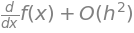

In [35]:
new_D.series(h, 0, 2).doit()

#### <span style="color:#505000">$b)$ Remplacement de fonction (méthode <span style="color:#804000;font-size:12pt"><tt><b>replace</b></tt></span> uniquemement)

In [36]:
D.replace( f , sb.cos )

In [37]:
a,b,c = sb.symbols("a,b,c")
def P(x) : return a*x**2 + b*x + c
P(h)

In [38]:
new_D.replace( f , P )

In [39]:
new_D.replace( f , P ).simplify()

In [40]:
new_D.replace( f , P ).equals( P(x).diff(x) )

True

### <span style="color:purple"> 10.3 Travail à faire </span>

L'objectif de cette exercice est de déterminer $\displaystyle \int_{-\pi}^{\pi}\cos(m\,t)\,\cos(n\,t)\,w(t)\;\mathbb{d}t$ dans différents cas de figure, $m$ et $n$ étant deux entiers naturels.

$a)$ Vérifier que $\displaystyle\cos(x)\,\cos(y)=\frac{\cos(x+y)+\cos(x-y)}{2}$.

On a donc $\displaystyle \int_{-\pi}^{\pi}\cos(m\,t)\,\cos(n\,t)\,w(t)\;\mathbb{d}t=\frac{1}{2}\,\left(I_{m+n}+I_{m-n}\right)$, où $\displaystyle I_{k}= \int_{-\pi}^{\pi}\cos(k\,t)\,w(t)\;\mathbb{d}t$. <br />$b)$ Définir l'expression symbolique $C = \cos(k\,t)\,w(t)$, où $k$ est un entier et $w$ une fonction indéfinie. 

$b)$ En utilisant l'expression C, déterminer $I_{0}$ lorsque $w(t)=\frac{1}{2\,\pi}$.

$c)$ En utilisant l'expression C, déterminer $I_{j}$ lorsque $j$ est un entier <u>non nul</u> et $w(t)=\frac{1}{2\,\pi}$. <br>$\hspace{5mm}$Conclure sur la valeur de l'intégrale recherchée lorsque $w(t)=\frac{1}{2\,\pi}$.

$d)$ Déterminer $I_k$ lorsque $\displaystyle w(t)=\frac{1}{4}\,\cos\!\left(\frac{t}{2}\right)$. En déduire la valeur de l'intégrale recherchée au départ, en fonction des entiers naturels $m$ et $n$, lorsque $\displaystyle w(t)=\frac{1}{4}\,\cos\!\left(\frac{t}{2}\right)$. <br />$\hspace{6mm}$Faire afficher le tableau correspondant pour $0\leqslant m\leqslant n\leqslant 5$.

## <span style="color: #0000BB"> *Exercice 11* </span>

### <span style="color:purple"> 11.1 Objectifs </span>

####  <span style="color:#005500"><i>Savoir récrire des expressions mathématiques par substitution de fonctions par d'autres fonctions,<br /> en maîtrisant la définition de « fonctions lambda »</i> $($<span style="color:#804000;font-size:12pt"><tt><b>lambda</b></tt></span>$)$ <i>et l’utilisation de la méthode</i> <span style="color:#804000;font-size:12pt"><tt><b>replace</b></tt></span>. </span>

Plus généralement, on apporte ici des compléments sur la définition des fonctions.<br /> Voir aussi le tutoriel : https://docs.python.org/3/tutorial/controlflow.html#more-on-defining-functions 

### <span style="color:purple"> 11.2 Exemples </span>

Objectif : créer une liste de fonctions $x\,\mapsto\,(x-x_0)^n$ pour $n$ entier de 0 à 8.

In [41]:
x,x_0 = sb.symbols("x,x_0")

<div class="alert alert-block alert-danger"><span style="color:#800000"><i>Noter que l'on prend garde à ne pas utiliser, dans le bloc de définition de la fonction, de variable extérieure à ce bloc. <br />Pour ce faire, on utilise des arguments supplémentaires avec des valeurs par défaut.</i></span></div>

#### $\star$ Copié-collé-modifié, bien évidemment déconseillé :

In [42]:
def f0(t) : 
    return 1
# t0 sert à récupérer ce que désigne x_0 AU MOMENT des définitions des fonctions.
def f1(t,t0=x_0) : 
    return t-t0  
def f2(t,t0=x_0) : 
    return (t-t0)**2
def f3(t,t0=x_0) : 
    return (t-t0)**3 # On s'arrête à n=3...
[ f(x) for f in [f0,f1,f2,f3] ]

#### $\star$ Utilisation d'une fonction temporaire que l'on ajoute dans une liste :

In [43]:
liste_fonc = []
for n in range(9) :
    def fonction_temporaire(t,t0=x_0,p=n) :
        return (t-t0)**p
    liste_fonc.append( fonction_temporaire )
[ f(x) for f in liste_fonc ]

In [44]:
liste_fonc[5](x)

#### $\star$ Utilisation de fonctions <tt>lambda</tt>, plus légère :

In [45]:
t =sb.symbols("t")
exemple = lambda t,t0=2,p=5 : (t-t0)**p
exemple(t)

In [46]:
LF = [ lambda t,t0=x_0,p=n : (t-t0)**p for n in range(9) ]
[ f(x) for f in LF ]

In [47]:
LF[5](x)

### <span style="color:purple"> 11.3 Travail à faire </span>

**<span style="color:#0050A0"><i>À propos des différences finies centrées d'ordre 2.</i></span>**

$a)$ Définir l'expression <span style="font-size:12pt"><tt><b>DF</b></tt></span>$\;=\;a_{-1}\,T(x-h)+a_{0}\,T(x)+a_{1}\,T(x+h)$, $T$ désignant une fonction indéfinie.
<br />$\hspace{6mm}$On pourra nommer les symboles $a_{-1}$, $a_{0}$ et $a_{1}$ respectivement <span style="font-size:12pt"><tt><b>am</b></tt></span>, <span style="font-size:12pt"><tt><b>a0</b></tt></span> et <span style="font-size:12pt"><tt><b>ap</b></tt></span>.

$b)$ Remplacer dans l'expression <span style="font-size:12pt"><tt><b>DF</b></tt></span> $a_{-1}$ par $\displaystyle\frac{-1}{2\,h}$, $a_0$ par 0 et $a_1$ par $\displaystyle\frac{1}{2\,h}$, pour obtenir une expression <span style="font-size:12pt"><tt><b>DF1</b></tt></span>.<br />$\hspace{5mm}$ Faire ensuite un développement limité de <span style="font-size:12pt"><tt><b>DF1</b></tt></span> en $h=0$ à l'ordre 2.<br />$\hspace{5mm}$ Pour améliorer la lisibilité du résultat, on pourra faire appel à la fin à la méthode <span style="font-size:12pt"><tt><b>doit()</b></tt></span>.

* <span style="color:#0000A0">Vérification avec la fonction <span style="font-size:12pt"><tt><b>as_finite_difference</b></tt></span> :</span>

In [48]:
try :
    print( DF1.equals( T(x).diff(x).as_finite_difference( [x-h, x, x+h] ) ) )
except Exception as e :
    print("Erreur :",e)

Erreur : name 'DF1' is not defined


$c)$ Faire de même pour <span style="font-size:12pt"><tt><b>DF2</b></tt></span>, obtenu en remplaçant $a_{-1}$ par $\displaystyle\frac{1}{h^2}$, $a_0$ par $\displaystyle\frac{-2}{h^2}$ et $a_1$ par $\displaystyle\frac{1}{h^2}$.

* <span style="color:#0000A0">Vérification avec la fonction <span style="font-size:12pt"><tt><b>as_finite_difference</b></tt></span> :</span>

In [49]:
try :
    print( DF2.equals( T(x).diff(x, 2).as_finite_difference( [x-h, x, x+h] ) ) )
except Exception as e :
    print("Erreur :",e)

Erreur : name 'DF2' is not defined


$d)$ Déterminer ce que valent <span style="font-size:12pt"><tt><b>DF1</b></tt></span> et <span style="font-size:12pt"><tt><b>DF2</b></tt></span> lorsque $T$ est la fonction $x\mapsto x^n$, pour $n$ entier variant de 0 à 4. Faire afficher également $T^{\prime}(x)$ et $T^{\prime\prime}(x)$.